<a href="https://colab.research.google.com/github/freddy120/heartfailure_vys/blob/main/Proyecto_Final_VyS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto final Visualización y Storytelling

Bases de datos:
* Causas de muerte de colombia en 2019. 
  * Global Health Estimates 2020: Deaths by Cause, Age, Sex, by Country and by Region, 2000-2019. Geneva, World Health Organization; 2020. https://www.who.int/data/gho/data/themes/mortality-and-global-health-estimates/ghe-leading-causes-of-death
* Datos de predicción de insuficiencia cardíaca: Aquí tenemos 918 observaciones de pacientes con 11 variables de interés. 
  * fedesoriano. (September 2021). Heart Failure Prediction Dataset. Retrieved [Date Retrieved] from https://www.kaggle.com/fedesoriano/heart-failure-prediction. 
* Datos de enfermedad cardiovascular: Aquí tenemos 70000 observaciones de pacientes con 11 variables de interés relativamente diferentes al dataset anterior y que nos permiten aumentar el análisis. 
  * https://www.kaggle.com/sulianova/cardiovascular-disease-dataset




In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt


In [2]:
heart_df = pd.read_csv("heart.csv")
cardio_df = pd.read_csv("cardio_train.csv", delimiter=';')
causas_muerte_df = pd.read_excel("causesofdeath_colombia_2019.xlsx")
print('Dimension dataset falla cardiaca: ', heart_df.shape)
print('Dimension dataset enfermedad cardiovascular: ', cardio_df.shape)
print('Dimension dataset causas de muerte: ', causas_muerte_df.shape)

Dimension dataset falla cardiaca:  (918, 12)
Dimension dataset enfermedad cardiovascular:  (70000, 13)
Dimension dataset causas de muerte:  (131, 11)


In [ ]:
causas_muerte_df.head()

,Code,Cause,ISO3,Year,Sex,Age Group,Population,Deaths,Death rate per 100 000 population,DALY,DALY rate per 100 000 population
0,1130,Ischaemic heart disease,COL,2019,MLE,ALLAges,24700000,22643.21,91.67,412396.5,1669.62
1,1620,Interpersonal violence,COL,2019,MLE,ALLAges,24700000,17510.22,70.89,922835.5,3736.18
2,1180,Chronic obstructive pulmonary disease,COL,2019,MLE,ALLAges,24700000,7813.25,31.63,132890.2,538.02
3,1140,Stroke,COL,2019,MLE,ALLAges,24700000,7443.58,30.14,152694.7,618.20
4,1530,Road injury,COL,2019,MLE,ALLAges,24700000,6345.95,25.69,353978.2,1433.11


In [ ]:
heart_df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
cardio_df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
heart_df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [ ]:
cardio_df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [ ]:
causas_muerte_df.isnull().sum()

Code                                 0
Cause                                0
ISO3                                 0
Year                                 0
Sex                                  0
Age Group                            0
Population                           0
Deaths                               0
Death rate per 100 000 population    0
DALY                                 0
DALY rate per 100 000 population     0
dtype: int64

* No hay presencia de nulos en las bases de datos

## Limpieza de datos

* Eliminación de registros duplicados.
* Eliminación de registros con datos nulos.
* Eliminar columnas de ID.
* Eliminación de columnas que no aportan al problema.
* Análisis exploratorio inicial.


In [ ]:
heart_df = heart_df.dropna().drop_duplicates()
cardio_df = cardio_df.dropna().drop_duplicates()
cardio_df = cardio_df.drop(columns=['id'])
causas_muerte_df = causas_muerte_df.dropna().drop_duplicates()
causas_muerte_df = causas_muerte_df.drop(columns=['Code', 'ISO3', 'Sex', 'Age Group'])

* Buscamos con las distribuciones alguna variable que más contribuya a la predicción de falla cardiaca o enfermedad cardiovascular.
* En el dataset de causas de muerte observamos que existen muchas causas de muerte, nos interesa solo el top 15.




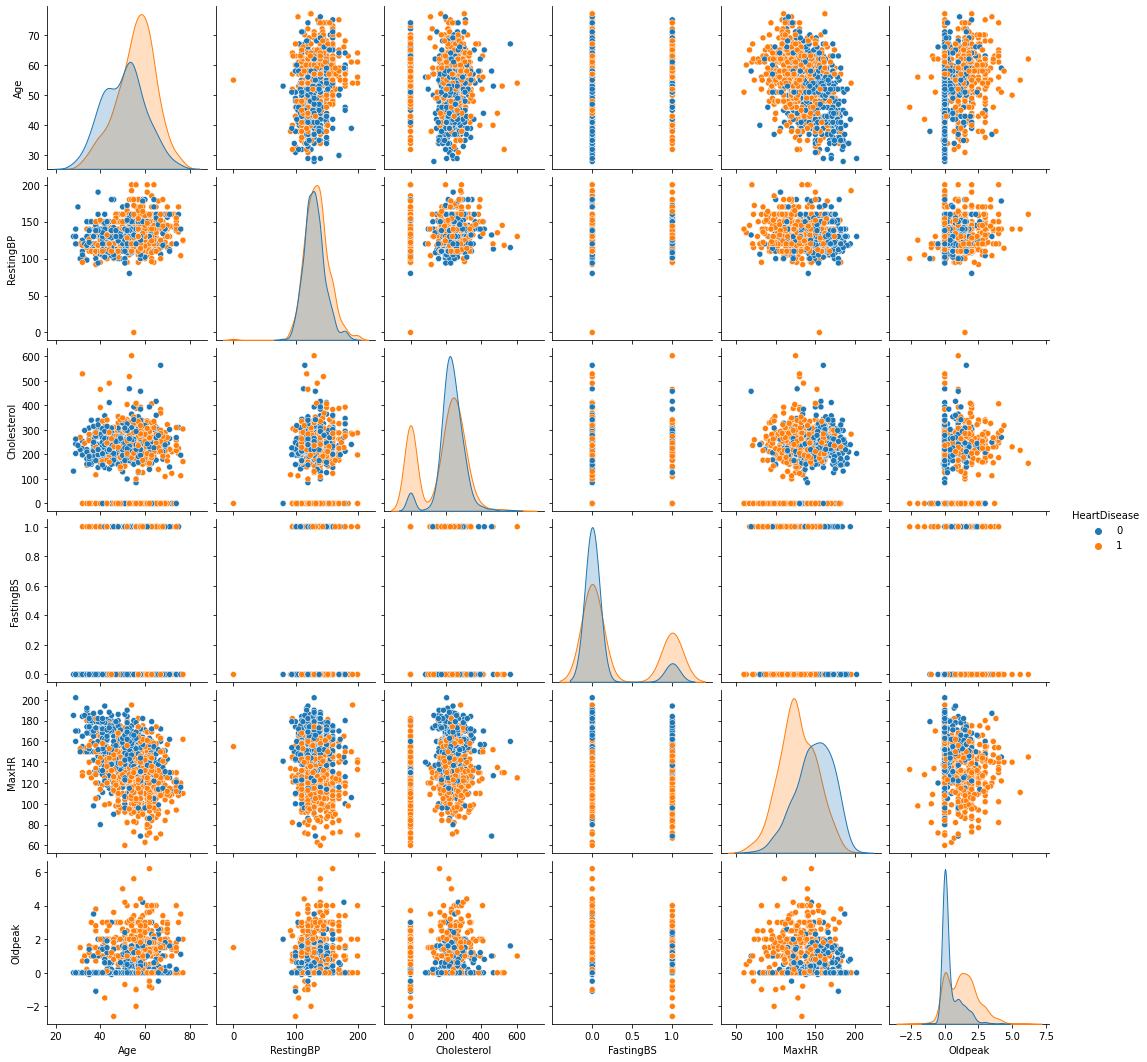

In [ ]:
sns.pairplot(heart_df, hue='HeartDisease')

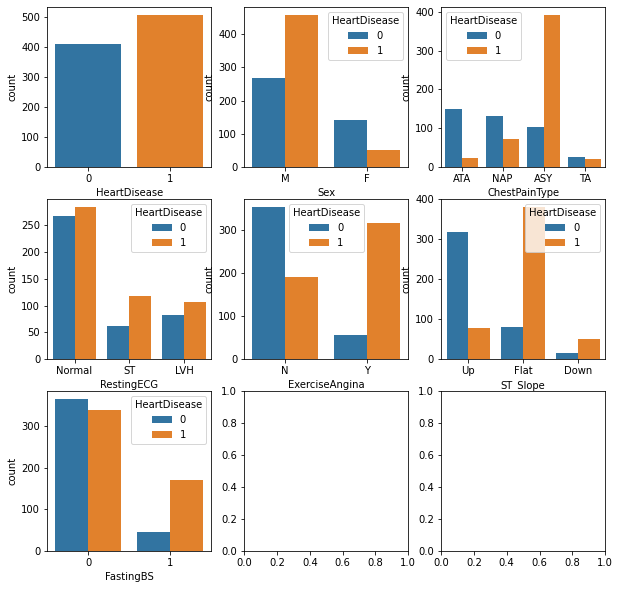

In [ ]:
fig, axes=plt.subplots(3,3, figsize=(10, 10))
sns.countplot(x = 'HeartDisease', data = heart_df, ax=axes[0,0])
sns.countplot(x = 'Sex', data = heart_df, ax=axes[0,1], hue='HeartDisease')
sns.countplot(x = 'ChestPainType', data = heart_df, ax=axes[0,2], hue='HeartDisease')
sns.countplot(x = 'RestingECG', data = heart_df, ax=axes[1,0], hue='HeartDisease')
sns.countplot(x = 'ExerciseAngina', data = heart_df, ax=axes[1,1], hue='HeartDisease')
sns.countplot(x = 'ST_Slope', data = heart_df, ax=axes[1,2], hue='HeartDisease')
sns.countplot(x = 'FastingBS', data = heart_df, ax=axes[2,0], hue='HeartDisease')

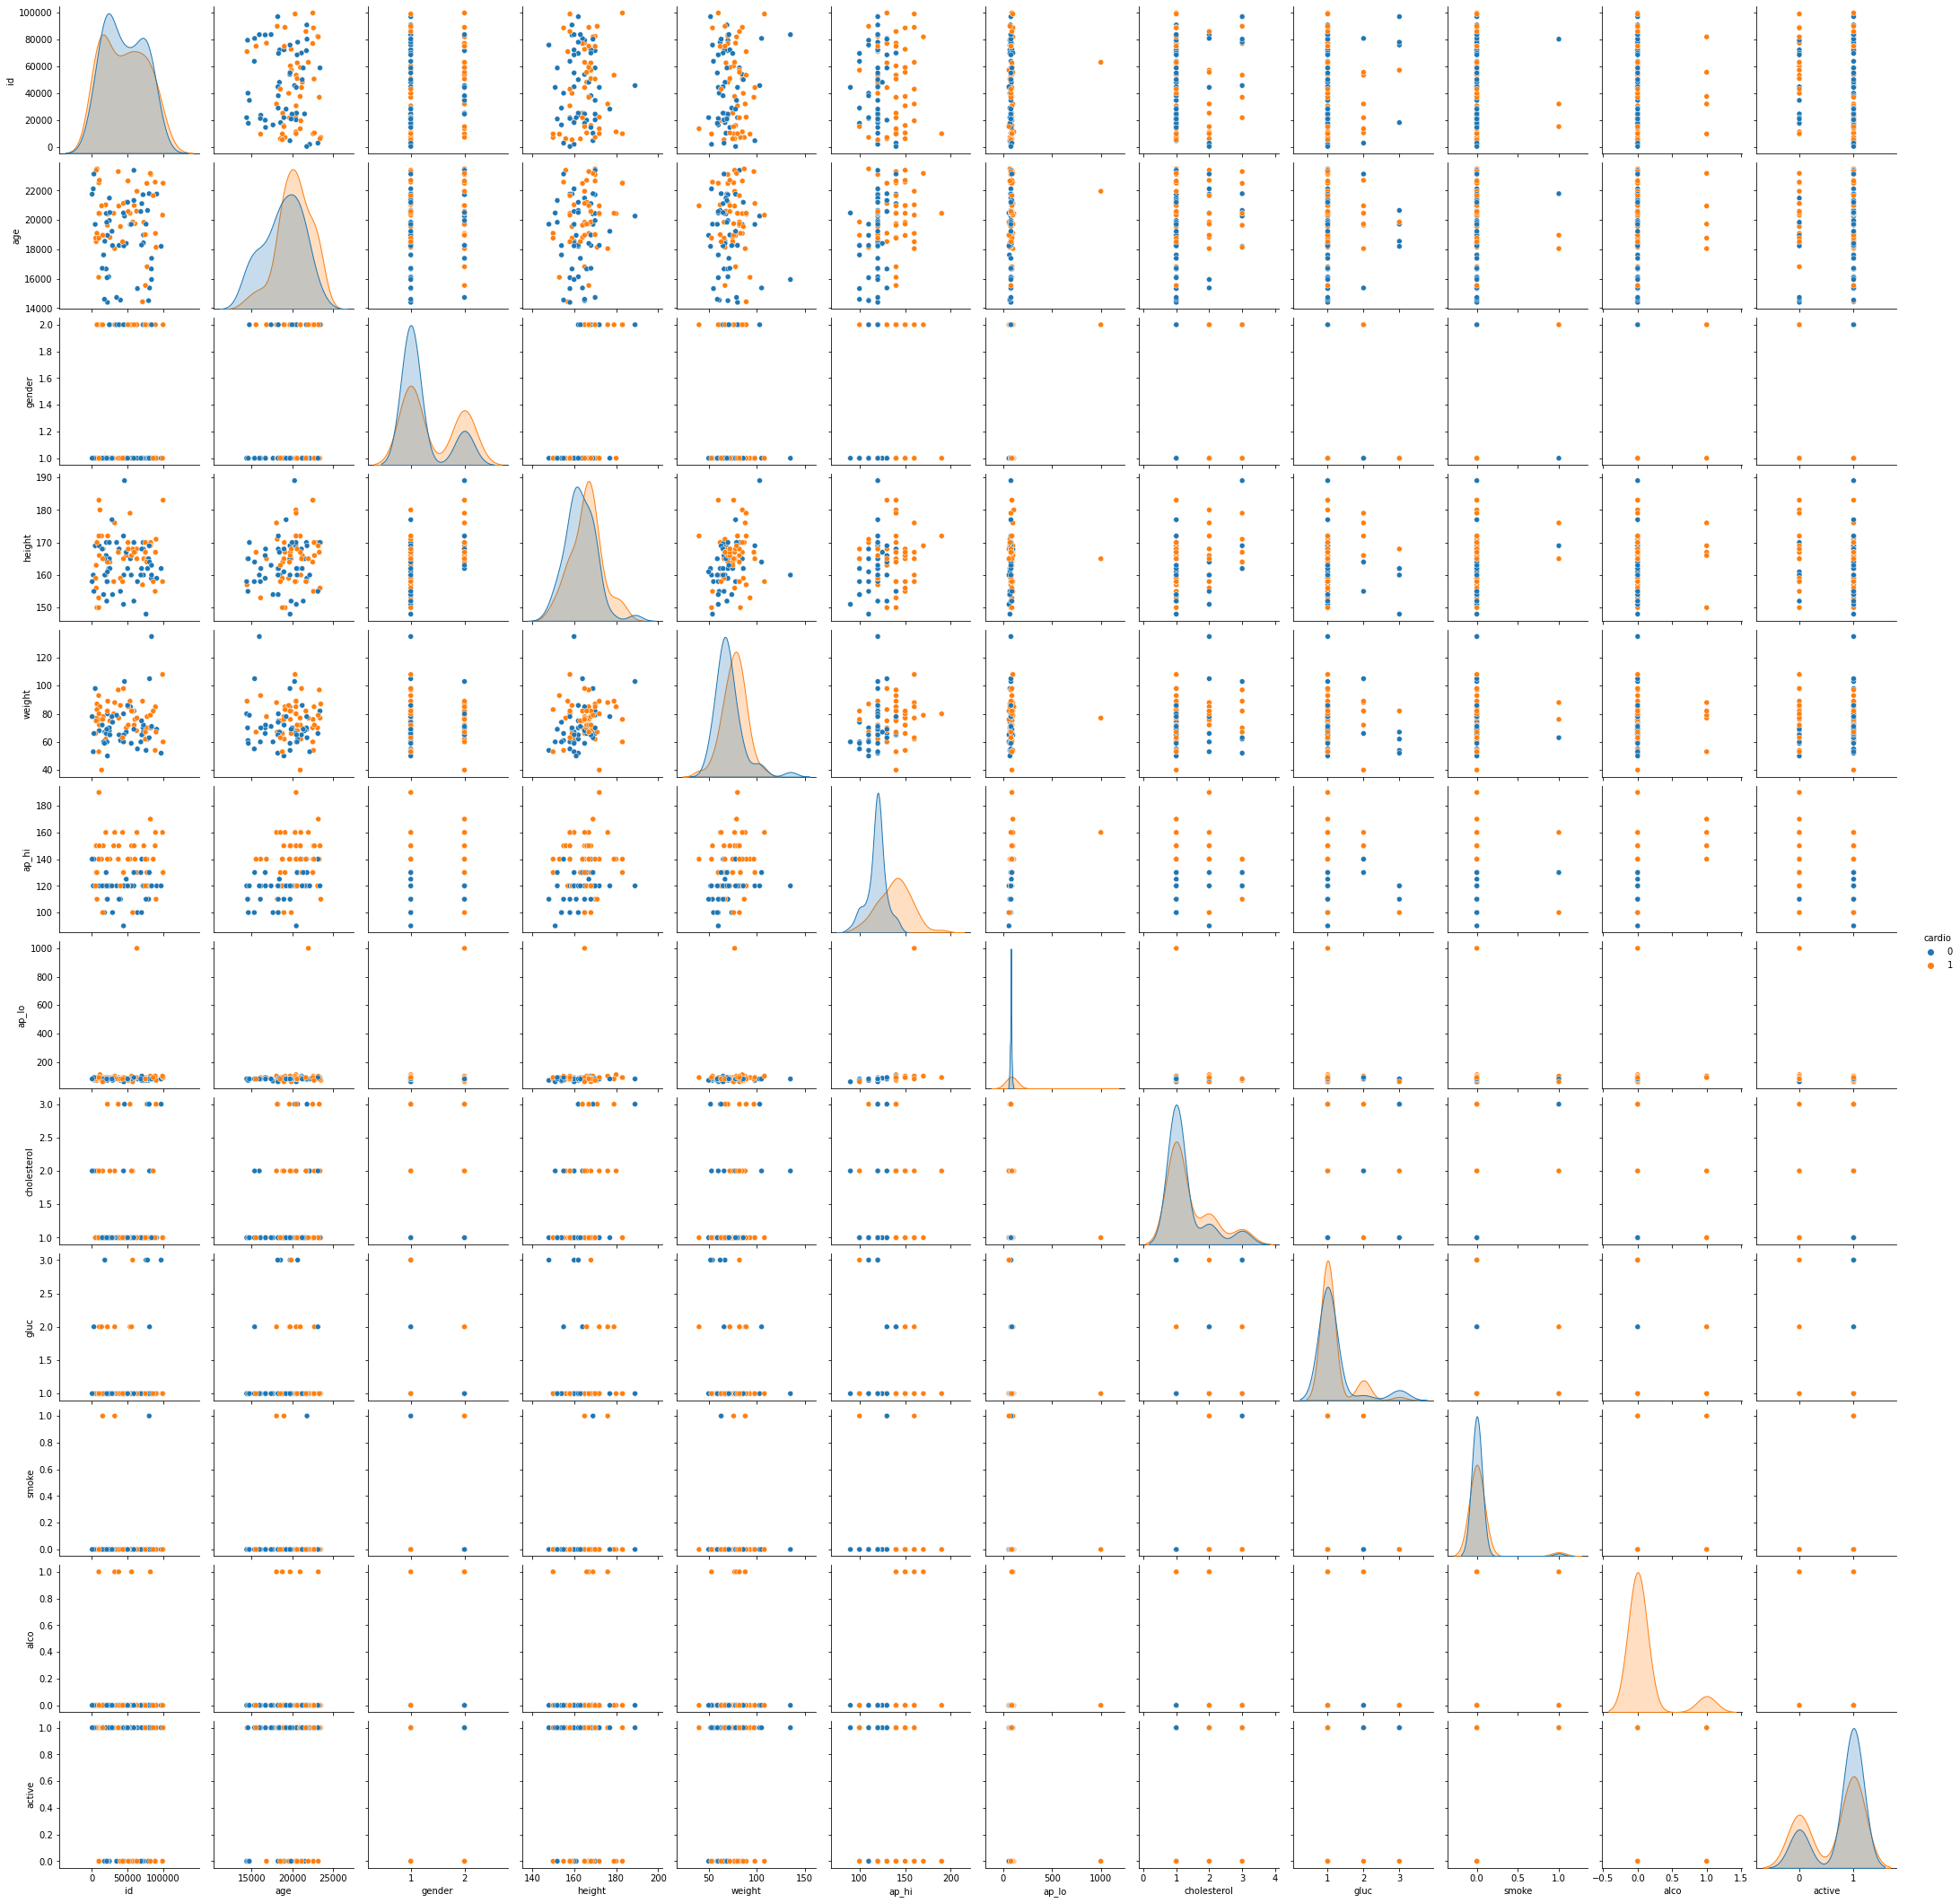

In [ ]:
sns.pairplot(cardio_df.sample(n=100, random_state=1), hue='cardio')

In [ ]:
causas_muerte_df['Cause']

0                    Ischaemic heart disease
1                     Interpersonal violence
2      Chronic obstructive pulmonary disease
3                                     Stroke
4                                Road injury
                       ...                  
126                        Other vision loss
127                       Other hearing loss
128                             Urolithiasis
129                              Infertility
130                   Gynecological diseases
Name: Cause, Length: 131, dtype: object

## Modelar los datos

* Traducción de nombres de variables del inglés al español.
* Transformacion de variables, cambio de unidades.
* Estandarizar etiquetas de variables categóricas y traducción al español.




In [ ]:
heart_df['Sex'] = heart_df['Sex'].apply(lambda x: "Masculino" if x=='M' else 'Femenino')
heart_df['FastingBS'] = heart_df['FastingBS'].apply(lambda x: "> 120 mg/dl" if x ==1 else "<= 120 mg/dl")
heart_df['ExerciseAngina'] = heart_df['ExerciseAngina'].apply(lambda x: "Si" if x=='Y' else 'No')
heart_df['HeartDisease'] = heart_df['HeartDisease'].apply(lambda x: "Si" if x==1  else 'No')
heart_df["ChestPainType"].replace({"ATA": "Angina atípica", "NAP": "Dolor no anginoso", "ASY": "Asintomático", "TA": "Angina típica"}, inplace=True)

heart_df = heart_df.rename(columns = {'Age': 'Edad', 'Sex': 'Sexo', 'ChestPainType': 'Dolor de pecho', 
                                      'RestingBP': 'Presión arterial en reposo(mm Hg)', 'Cholesterol': 'Colesterol total(mm/dl)', 
                                      'FastingBS': 'Glucosa sanguínea en ayunas', 'RestingECG': 'EEG en reposo', 
                                      'MaxHR': 'Max Frecuencia cardíaca', 'ExerciseAngina': 'Angina de ejercicio', 
                                      'Oldpeak': 'Depresión del ST inducida', 'ST_Slope': 'Pendiente ST', 'HeartDisease': 'Enfermedad cardíaca'}, inplace = False)


In [ ]:
cardio_df['age'] = cardio_df['age'].apply(lambda x: round(x*0.0027))
cardio_df['gender'] = cardio_df['gender'].apply(lambda x: "Masculino" if x==2 else 'Femenino')
cardio_df['cardio'] = cardio_df['cardio'].apply(lambda x: "Si" if x==1  else 'No')
cardio_df["cholesterol"].replace({1: "Normal", 2: "Encima de lo normal", 3: "Muy por encima de lo normal"}, inplace=True)
cardio_df["gluc"].replace({1: "Normal", 2: "Encima de lo normal", 3: "Muy por encima de lo normal"}, inplace=True)
cardio_df["smoke"].replace({0: "No fumador", 1: "Fumador"}, inplace=True)
cardio_df["alco"].replace({0: "No Consumo de alcohol", 1: "Consumo de alcohol"}, inplace=True)
cardio_df["active"].replace({0: "No actividad física", 1: "Actividad física"}, inplace=True)

cardio_df = cardio_df.rename(columns = {'age': 'Edad', 'gender': 'Sexo', 'height': 'altura(cm)', 
                                      'weight': 'Peso(kg)', 'ap_hi': 'Presión sanguínea sistólica', 
                                      'ap_lo': 'Presión arterial diastólica', 'cholesterol': 'Nivel de Colesterol', 
                                      'gluc': 'Nivel de Glucosa', 'smoke': 'De fumar', 
                                      'alco': 'Consumo de alcohol', 'active': 'Actividad física', 'cardio': 'Enfermedad cardíaca'}, inplace = False)



In [ ]:

causas_muerte_df["Cause"].replace({"Ischaemic heart disease": "Enfermedad isquémica del corazón", 
                                           "Interpersonal violence": "Violencia interpersonal", 
                                           "Chronic obstructive pulmonary disease": "Afección pulmonar obstructiva crónica", 
                                           "Stroke": "Derrame cerebral",
                                           "Road injury": "Accidente automovilístico",
                                           "Lower respiratory infections": "Neumonía",
                                           "Stomach cancer": "Cáncer de estómago",
                                           "Kidney diseases": "Enfermedad renal",
                                           "Prostate cancer": "Cancer de prostata",
                                           "Hypertensive heart disease": "Hipertensión arterial",
                                           "Trachea, bronchus, lung cancers": "Tráquea, bronquios, cánceres de pulmón",
                                           "Neonatal conditions":"Condiciones neonatales",
                                           "HIV/AIDS": "VIH/SIDA",
                                           "Diabetes mellitus": "Diabetes mellitus",
                                           "Colon and rectum cancers": "Cánceres de colon y recto"}, inplace=True)


causas_muerte_df = causas_muerte_df.rename(columns = {'Cause': 'Causa', 'Population': 'Población',
                                                      'Death rate per 100 000 population': 'Tasa de mortalidad por 100 000 habitantes',
                                                      'Deaths': "Muertes"}, inplace = False)
causas_muerte_df = causas_muerte_df.drop(columns=['Year', 'DALY', 'DALY rate per 100 000 population'])





## Guardar archivos procesados.

*   Guardar los archivos ya procesados para su posterior uso en google data studio.



In [ ]:
heart_df.to_csv("heart_v1.csv",index=False)
cardio_df.to_csv("cardio_v1.csv", index=False)
causas_muerte_df.head(15).to_csv("causa_muertes_colombia_2019.csv", index=False)